<a href="https://colab.research.google.com/github/mohanrajmit/Bird-Classification-using-CNN/blob/master/bird_neuralnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [3]:
# Load data set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# CIFAR10 has ten types of images labeled from 0 to 9. We only care about birds, which are labeled as class #2.
# So we'll cheat and change the Y values. Instead of each class being labeled from 0 to 9, we'll set it to True
# if it's a bird and False if it's not a bird.
y_train = (y_train == 2).astype(int)
y_test = (y_test == 2).astype(int)

In [5]:
x_train = x_train.reshape(50000,3072)
x_test = x_test.reshape(10000,3072)

In [6]:
# Normalize image data (pixel values from 0 to 255) to the 0-to-1 range
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
print(x_test.shape)
print(x_train.shape)

(10000, 3072)
(50000, 3072)


In [11]:
from keras.layers import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
model.add(Dense(1024, input_dim=3072,activation='relu'))
model.add(Dense(512, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation="sigmoid"))


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 3,835,905
Trainable params: 3,835,905
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,
          batch_size=32,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
1563/1563 [==============================] - 9s 4ms/step - loss: 0.3360 - accuracy: 0.8967 - val_loss: 0.2929 - val_accuracy: 0.9000
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2933 - accuracy: 0.8994 - val_loss: 0.2860 - val_accuracy: 0.9000
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2897 - accuracy: 0.8985 - val_loss: 0.2868 - val_accuracy: 0.9000
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2777 - accuracy: 0.9023 - val_loss: 0.2782 - val_accuracy: 0.8999
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2777 - accuracy: 0.9022 - val_loss: 0.2843 - val_accuracy: 0.9000
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.2792 - accuracy: 0.8983 - val_loss: 0.2765 - val_accuracy: 0.9000
Epoch 7/10
1563/1563 [==============================] - 5s 4ms/step - loss: 0.2775 - accuracy: 0.8995 - val_loss: 0.2801 - val_accuracy:

In [15]:

# Save the trained model to a file so we can use it to make predictions later
model.save("bird_model.h5")

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model

In [17]:
# Load the model we trained
model = load_model('bird_model.h5')
predictions = model.predict(x_test, batch_size=32, verbose=1)

# If the model is more than 50% sure the object is a bird, call it a bird.
# Otherwise, call it "not a bird".
predictions = predictions > 0.5

# Calculate how many mis-classifications the model makes
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f"True Positives: {tp}")
print(f"True Negatives: {tn}")
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

# Calculate Precision and Recall for each class
report = classification_report(y_test, predictions)
print(report)

313/313 [==============================] - 1s 2ms/step
True Positives: 2
True Negatives: 8998
False Positives: 2
False Negatives: 998
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9000
           1       0.50      0.00      0.00      1000

    accuracy                           0.90     10000
   macro avg       0.70      0.50      0.48     10000
weighted avg       0.86      0.90      0.85     10000



[[0.]]
not bird


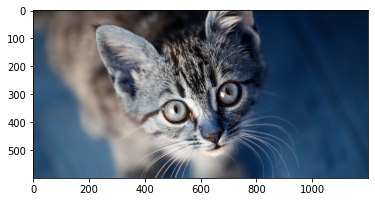

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
img=cv2.imread("/content/1.png")
img2=cv2.resize(img, (32, 32),interpolation=cv2.INTER_AREA)
img1=img2.flatten()
img1=img1.reshape(1,-1)
# insert a new axis along the row
#sample_test_image = x_test[100]
#b = np.expand_dims(img2, axis=0)
res=model.predict(img1)
#print(label_name[int(res)])

plt.imshow(img)
print(res)
if res > 0.5:
  print("bird")
else:
  print("not bird")